#  Timeframes Exploration

In [2]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore

## Appliance training on multiple houses 

In [3]:
dataset = DataSet('ukdale.h5')

appliance = 'microwave'
houses = [1,2,5]

start_list = []
end_list = []
#find timeframes where meters are active
for i in houses:
    try:
    
        train_meter = dataset.buildings[i].elec[appliance]
        train_mains = dataset.buildings[i].elec.mains()

        start_app = train_meter.get_timeframe().start.date()
        end_app =  train_meter.get_timeframe().end.date()

        start_list.append(start_app)
        end_list.append(end_app)

        print(start_app < end_app)
        print('HOUSE {}'.format(i))
        print('{} meter: start {}   end {}'.format( appliance, start_app, end_app)) 
        start_mains = train_mains.get_timeframe().start.date()
        end_mains =  train_mains.get_timeframe().end.date()   
        print('Mains meter: start {}   end {}'.format( start_mains, end_mains))
        print()
        
    except:
        print("There is no {} in house {}".format())
    
x = max(start_list)
print('The common time interval for kettle meter is: START {}    END {}'.format(max(start_list),min(end_list)))
    
    

C:\Users\dimit\Desktop\Msc Business Analytics\Dissertation\My_code\nilm_metadata\file_management.py:16: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  objs = yaml.load(fh)


True
HOUSE 1
microwave meter: start 2012-12-14   end 2017-04-26
Mains meter: start 2013-03-17   end 2017-04-26

True
HOUSE 2
microwave meter: start 2013-05-20   end 2013-10-10
Mains meter: start 2013-04-16   end 2013-10-10

True
HOUSE 5
microwave meter: start 2014-06-29   end 2014-11-13
Mains meter: start 2014-06-29   end 2014-11-13

The common time interval for kettle meter is: START 2014-06-29    END 2013-10-10


## Appliance testing on one house

In [25]:
appliance = 'kettle'
house = 5

test_meter = dataset.buildings[house].elec[appliance]
test_mains = dataset.buildings[house].elec.mains()

start_app = test_meter.get_timeframe().start.date()
end_app =  test_meter.get_timeframe().end.date()

start_mains = test_mains.get_timeframe().start.date()
end_mains =  test_mains.get_timeframe().end.date()
print('HOUSE {}'.format(house))
print('{} meter: start {}   end {}'.format( appliance, start_app, end_app))
print('Mains meter: start {}   end {}'.format(start_mains, end_mains))

HOUSE 5
kettle meter: start 2014-06-29   end 2014-09-07
Mains meter: start 2014-06-29   end 2014-11-13


## Extract activations

In [35]:
dataset.set_window("1-1-2014", "1-2-2014")

BUILDING = 1
elec = dataset.buildings[BUILDING].elec
fridge = elec['microwave']

Number of activations = 8


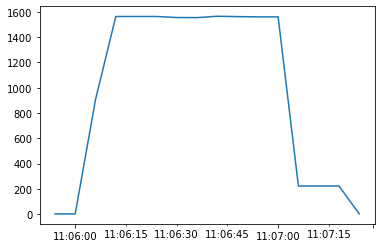

In [36]:
activations = fridge.get_activations()
print("Number of activations =", len(activations))

activations[1].plot()
plt.show()